In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

import statsmodels.api as sm

# Ontario's Social Distancing Score

In [86]:
# import data
mobility_ontario = pd.read_csv('../../data/cleaned_data/modeling_data.csv')

# drop column
mobility_ontario = mobility_ontario.drop('Unnamed: 0', axis=1)

# define features and target
features = ['New Cases (Ontario)', 'New Cases (World)', \
            'New Deaths (World)', 'New Deaths (Ontario)', 'Mean Temperature', 'Total Precipitation', \
            'Days Since First Case']
target = 'Score'

In [87]:
mobility_ontario.columns

Index(['Date', 'Score', 'Confirmed Cases (Ontario)', 'New Cases (Ontario)',
       'New Cases (World)', 'Cumulative Cases (World)', 'New Deaths (World)',
       'Cumulative Deaths (World)', 'Mean Temperature', 'Total Precipitation',
       'Days Since First Case', 'Letter Score'],
      dtype='object')

## Multiple Linear Regression

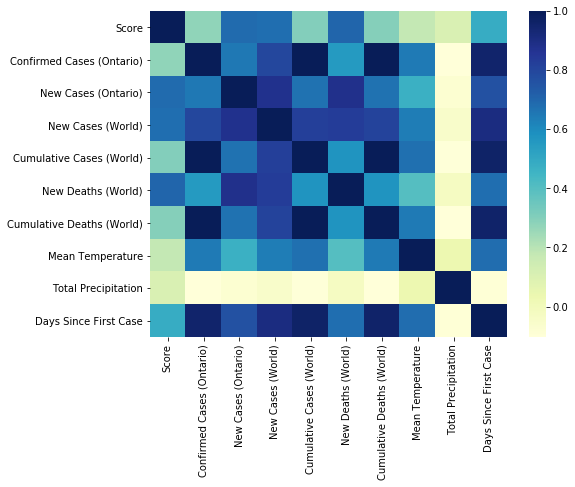

In [88]:
# Multicollinearity assumption

# Drop column
corr_data = mobility_ontario.drop('Date', axis=1)

# Correlation matrix
corr = corr_data.corr()

# heatmap to visualize correlation
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr, cmap="YlGnBu")
# heatmap.set_xticklabels(labels=['Score', 'Confirmed Cases (Ontario)', 'New Cases (Ontario)', 
#                                 'New Cases (World)', 'Cumulative Cases (World)', 'New Deaths (World)', 
#                                 'Cumulative Deaths (World)', 'Mean Temperature', 'Total Precipitation', 
#                                 'Days Since First Case'] , rotation=80)
fig = heatmap.get_figure()
fig.savefig("output.png")

### MLR with all features

In [89]:
X_mlr = mobility_ontario[features]
y_mlr = mobility_ontario[target]

mlr = sm.OLS(y_mlr, X_mlr).fit()
predictions = mlr.predict(X_mlr)

mlr.summary()

KeyError: "['New Deaths (Ontario)'] not in index"

### MLR with selected features

In [ ]:
features = ['Confirmed Cases (Ontario)', 'New Cases (Ontario)', 'New Cases (World)', 'Cumulative Cases (World)', \
            'Mean Temperature', 'Total Precipitation', \
            'Days Since First Case']

X_mlr = mobility_ontario[features]
y_mlr = mobility_ontario[target]

mlr = sm.OLS(y_mlr, X_mlr).fit()
predictions = mlr.predict(X_mlr)

mlr.summary()

## Conclusion

Multiple linear regression might not be a good model to model relationship between Ontario's social distancing score and the features we have. It violates the "no multicollinearity" assumption between the independent variables. As shown in the heatmap for the variables above, certain independent variables are highly correlated with each other.

## Random forests classification for Ontario's Social Distancing Score

In [90]:
# import data
mobility_ontario = pd.read_csv('../../data/cleaned_data/modeling_data.csv')

# drop column
mobility_ontario = mobility_ontario.drop('Unnamed: 0', axis=1)

# define features and target
features = ['Confirmed Cases (Ontario)', 'New Cases (Ontario)', 'New Cases (World)', 'Cumulative Cases (World)', \
            'New Deaths (World)', 'Cumulative Deaths (World)', 'Mean Temperature', 'Total Precipitation', \
            'Days Since First Case']
target = 'Letter Score'

In [91]:
# Define features and target
X = mobility_ontario[features]
y = mobility_ontario[target]

# Create training and testing data
X_train = mobility_ontario[features][:44]
y_train = mobility_ontario[target][:44]
X_test = mobility_ontario[features][44:]
y_test = mobility_ontario[target][44:]

In [92]:
# Create Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
# Model evaluation
# rfc_cv_score = cross_val_score(rfc, X, y, cv=5, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
# print("=== All AUC Scores ===")
# print(rfc_cv_score)
# print('\n')
# print("=== Mean AUC Score ===")
# print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[12 15  0]
 [ 4  9  0]
 [ 0  6  0]]


=== Classification Report ===
              precision    recall  f1-score   support

           A       0.75      0.44      0.56        27
           B       0.30      0.69      0.42        13
           C       0.00      0.00      0.00         6

    accuracy                           0.46        46
   macro avg       0.35      0.38      0.33        46
weighted avg       0.53      0.46      0.45        46





/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest classification for predicting social distancing score (Data by province)

In [94]:
# Import data
modeling_data = pd.read_csv('../../data/cleaned_data/modeling_data_province.csv')

# Drop column
modeling_data = modeling_data.drop('Unnamed: 0', axis=1)

# # define features and target
features = ['Confirmed', 'Probable', 'Death', 'New Cases', 'New Probable', 'New Deaths', 'Mean Temperature', \
            'Total Precipitation', 'New Cases (world)', 'Confirmed (world)', 'New Deaths (world)', 'Deaths (world)', \
            'Days Since First Case']
target = 'Letter Score'

In [95]:
modeling_data

,Province,Date,Score,pruid,Confirmed,Probable,Death,New Cases,New Probable,New Deaths,Mean Temperature,Total Precipitation,New Cases (world),Confirmed (world),New Deaths (world),Deaths (world),Days Since First Case,Letter Score
0,British Columbia,2020-02-16,1,59,5,0,0.0,1,0,0.0,5.0,4.8,2090,69277,142,1669,20,D
1,Ontario,2020-02-16,4,35,3,0,0.0,0,0,0.0,1.4,0.4,2090,69277,142,1669,20,D
2,Ontario,2020-02-21,21,35,3,0,0.0,0,0,0.0,-4.1,0.2,1044,76817,120,2249,25,C
3,British Columbia,2020-02-21,5,59,6,0,0.0,1,0,0.0,4.8,18.4,1044,76817,120,2249,25,D
4,British Columbia,2020-02-24,13,59,6,0,0.0,0,0,0.0,3.0,5.4,619,79565,164,2627,28,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,Nova Scotia,2020-05-25,47,12,1051,0,58.0,1,0,0.0,11.4,0.0,102660,5333415,3527,343115,119,B
691,Ontario,2020-05-25,39,35,25904,0,2102.0,404,0,29.0,24.1,1.4,102660,5333415,3527,343115,119,C
692,Quebec,2020-05-25,36,24,47984,0,4069.0,573,0,85.0,17.8,0.0,102660,5333415,3527,343115,119,C
693,Saskatchewan,2020-05-25,15,47,634,0,7.0,2,0,0.0,11.6,0.0,102660,5333415,3527,343115,119,D


In [96]:
# Define features and target
X = modeling_data[features]
y = modeling_data[target]

# Create training and testing data
X_train = modeling_data[features][:350]
y_train = modeling_data[target][:350]
X_test = modeling_data[features][350:]
y_test = modeling_data[target][350:]

# from sklearn.model_selection import train_test_split
# # implementing train-test-split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [97]:
# Create Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
# # Tuning hyperparameters
# from sklearn.model_selection import RandomizedSearchCV
# # number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # number of features at every split
# max_features = ['auto', 'sqrt']

# # max depth
# max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
# max_depth.append(None)
# # create random grid
# random_grid = {
#  'n_estimators': n_estimators,
#  'max_features': max_features,
#  'max_depth': max_depth
#  }
# # Random search of parameters
# rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the model
# rfc_random.fit(X_train, y_train)
# # print results
# print(rfc_random.best_params_)

In [99]:
# Model evaluation
# rfc_cv_score = cross_val_score(rfc, X, y, cv=5, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))

=== Confusion Matrix ===
[[127   6   0   0]
 [116  21   0   0]
 [ 57  11   0   0]
 [  7   0   0   0]]


=== Classification Report ===
              precision    recall  f1-score   support

           A       0.41      0.95      0.58       133
           B       0.55      0.15      0.24       137
           C       0.00      0.00      0.00        68
           D       0.00      0.00      0.00         7

    accuracy                           0.43       345
   macro avg       0.24      0.28      0.20       345
weighted avg       0.38      0.43      0.32       345



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfc, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

ModuleNotFoundError: No module named 'eli5'

# Random Forests Regression for predicting number of new cases in Canada

In [ ]:
# Import data
modeling_data = pd.read_csv('../../data/cleaned_data/modeling_data_province.csv')

# Drop column
modeling_data = modeling_data.drop('Unnamed: 0', axis=1)

# # define features and target
features = ['Confirmed', 'Probable', 'Death', 'New Cases', 'New Probable', 'New Deaths', 'Mean Temperature', \
            'Total Precipitation', 'New Cases (world)', 'Confirmed (world)', 'New Deaths (world)', 'Deaths (world)', \
            'Days Since First Case']
target = 'Score'

In [101]:
# Define features and target
X = modeling_data[features]
y = modeling_data[target]


# Create training and testing data
X_train = modeling_data[features][:350]
y_train = modeling_data[target][:350]
X_test = modeling_data[features][350:]
y_test = modeling_data[target][350:]

y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# from sklearn.model_selection import train_test_split
# # implementing train-test-split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [102]:
y_train.dtype

dtype('float64')

In [103]:
# Create Random Forest Classifier
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
rfc

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [104]:
y_test = y_test.astype(float)

In [105]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'C'

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'D'

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'D'

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The sc

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# MLR 

In [116]:
# Import data
modeling_data = pd.read_csv('../../data/cleaned_data/modeling_data_province.csv')

# Drop column
modeling_data = modeling_data.drop('Unnamed: 0', axis=1)

# # define features and target
# features = ['Confirmed', 'Probable', 'Death', 'New Cases', 'New Probable', 'New Deaths', 'Mean Temperature', \
#             'Total Precipitation', 'New Cases (world)', 'Confirmed (world)', 'New Deaths (world)', 'Deaths (world)', \
#             'Days Since First Case']
features = ['Score',
       'New Cases', 'New Deaths', 'Mean Temperature',
       'Total Precipitation', 'New Cases (world)', 
       'New Deaths (world)', 'Days Since First Case']
target = 'Score'

In [117]:
modeling_data.columns

Index(['Province', 'Date', 'Score', 'pruid', 'Confirmed', 'Probable', 'Death',
       'New Cases', 'New Probable', 'New Deaths', 'Mean Temperature',
       'Total Precipitation', 'New Cases (world)', 'Confirmed (world)',
       'New Deaths (world)', 'Deaths (world)', 'Days Since First Case',
       'Letter Score'],
      dtype='object')

In [118]:
X_mlr = modeling_data[features]
y_mlr = modeling_data[target]

mlr = sm.OLS(y_mlr, X_mlr).fit()
# predictions = mlr.predict(X_mlr)

mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.529e+28
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                        0.00
Time:                        19:21:13   Log-Likelihood:                          17573.
No. Observations:                 695   AIC:                                 -3.513e+04
Df Residuals:                     687   BIC:                                 -3.509e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Score                     1.0000   4.88e-15   2.05e+14      0.000       1.000       1.000
New Cases             -1.042e-14   7.44e-16    -14.005      0.000   -1.19e-14   -8.96e-15
New Deaths            -7.563e-16   7.44e-15     -0.102      0.919   -1.54e-14    1.39e-14
Mean Temperature      -1.804e-16   1.84e-14     -0.010      0.992   -3.62e-14    3.59e-14
Total Precipitation     1.11e-16   1.82e-14      0.006      0.995   -3.56e-14    3.58e-14
New Cases (world)      7.969e-18   8.32e-18      0.958      0.338   -8.36e-18    2.43e-17
New Deaths (world)     1.947e-16   6.53e-17      2.983      0.003    6.66e-17    3.23e-16
Days Since First Case -1.721e-15   5.44e-15     -0.316      0.752   -1.24e-14    8.96e-15
==============================================================================
Omnibus:                      390.349   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2961.960
Skew:                           2.463   Prob(JB):                         0.00
Kurtosis:                      11.833   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# MLR - Social Distancing Score vs. Provinces, New cases

In [4]:
# Import data
modeling_data = pd.read_csv('../../data/cleaned_data/modeling_data_province.csv')

# Drop column
modeling_data = modeling_data.drop('Unnamed: 0', axis=1)

# # define features and target
features = ['New Cases', 'New Deaths', 'Mean Temperature']
target = 'Score'

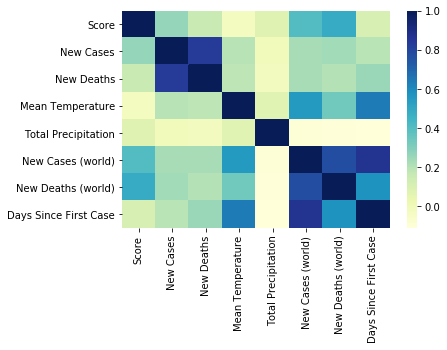

In [8]:
# Multicollinearity assumption

# Drop column
corr_data = modeling_data.drop(['Date', 'pruid', 'Confirmed', 'Probable', 'Death', 'Confirmed (world)', \
                                'Deaths (world)', 'New Probable', 'Letter Score', \
                                ], axis=1)

# Correlation matrix
corr = corr_data.corr()

# plt.figure(figsize=(8, 6))
# heatmap = sns.heatmap(corr, cmap="YlGnBu")
# # heatmap.set_xticklabels(labels=['Score', 'Confirmed Cases (Ontario)', 'New Cases (Ontario)', 
# #                                 'New Cases (World)', 'Cumulative Cases (World)', 'New Deaths (World)', 
# #                                 'Cumulative Deaths (World)', 'Mean Temperature', 'Total Precipitation', 
# #                                 'Days Since First Case'] , rotation=80)
# fig = heatmap.get_figure()
# fig.savefig("output.png")

# heatmap to visualize correlation
heatmap = sns.heatmap(corr, cmap="YlGnBu")
fig = heatmap.get_figure()
fig.savefig("output.png", dpi=600, bbox_inches='tight')

In [ ]:
features = ['Mean Temperature', 'New Cases', 'New Deaths']
target = 'Score'

X_mlr = corr_data[features]
y_mlr = corr_data[target]

mlr = sm.OLS(y_mlr, X_mlr).fit()
predictions = mlr.predict(X_mlr)

mlr.summary()

In [ ]:
# Linearly combine "New Cases" and "New Deaths" since they are strongly correlated
corr_data['Cases + Deaths'] = corr_data['New Cases'] + corr_data['New Deaths']
corr_data = corr_data.drop(['New Cases', 'New Deaths'], axis=1)
corr = corr_data.corr()
sns.heatmap(corr, cmap="YlGnBu")

In [ ]:
features = ['Mean Temperature', 'Cases + Deaths']
target = 'Score'

X_mlr = corr_data[features]
y_mlr = corr_data[target]

mlr = sm.OLS(y_mlr, X_mlr).fit()
predictions = mlr.predict(X_mlr)

mlr.summary()

In [ ]:
sns.pairplot(x_vars=['Mean Temperature', 'Cases + Deaths'], y_vars='Score', data=corr_data)

In [ ]:
corr_data

# Improved MLR?